## Dominik Adamczyk
### Mownit Lab8 rozwiązania

#### Zadanie 1 (2 pkt)
Ustal losowe (referencyjne) x rozmiaru 1000 oraz losowe A rozmiaru 1000x1000, policz b=A*x.
Nastepnie rozwiąż równanie Ax=b trzema metodami:
- inv()
- \
- factorize()

Porównaj jakość wyniku (zmierzoną jako długość różnicy wektorów wyniku oraz referencyjnego x) oraz czas wykonania (@time). UWAGA: pierwsze wykonanie funkcji w Julii zawiera czas kompilacji tej funkcji, dlatego czas mierzymy  od drugiego wywołania !


In [17]:
using LinearAlgebra
using DataFrames
using CSV
using Plots
using Polynomials
using Statistics

In [4]:
function vecLen(V)
    return sqrt(dot(V, V))
end

vecLen (generic function with 1 method)

In [8]:
x = rand(1000)
A = rand(1000, 1000)
b = A * x

invT = @elapsed inv(A) * b
invLen = vecLen(x - inv(A) * b)

slashT = @elapsed A\b
slashLen = vecLen(x - A\b)

factT = @elapsed factorize(A)\b
factLen = vecLen(x - factorize(A)\b)

df = DataFrame(Method=String[], Time=Float64[], Error=Float64[])
push!(df, ["inv()", invT, invLen])
push!(df, ["slash", slashT, slashLen])
push!(df, ["factorize()", factT, factLen])
df

Row,Method,Time,Error
,String,Float64,Float64
1,inv(),0.0850222,2.2204e-11
2,slash,0.0165515,1.16949e-11
3,factorize(),0.0228352,1.16949e-11


#### Zadanie 2 (2 pkt)
Policz współczynniki wielomianu aproksymującego dowolne dane z poprzednich laboratoriów tworząc wprost układ równań i rozwiązujac go (metoda z użyciem faktoryzacji QR zaprezentowana na tym laboratorium).
Porównaj wyniki z tymi otrzymanymi poprzednio.

In [20]:
data = CSV.read("times_c.csv", delim=",", DataFrame)
stats = filter(:type => n -> n == "naive_multiplication",
combine(groupby(data, [:type, :size]), "time" => mean))

Row,type,size,time_mean
,String31,Int64,Float64
1,naive_multiplication,150,0.0107388
2,naive_multiplication,300,0.0873445
3,naive_multiplication,450,0.302265
4,naive_multiplication,600,0.752689
5,naive_multiplication,750,1.54446
6,naive_multiplication,900,3.12775
7,naive_multiplication,1050,5.12974
8,naive_multiplication,1200,9.52037
9,naive_multiplication,1350,10.783


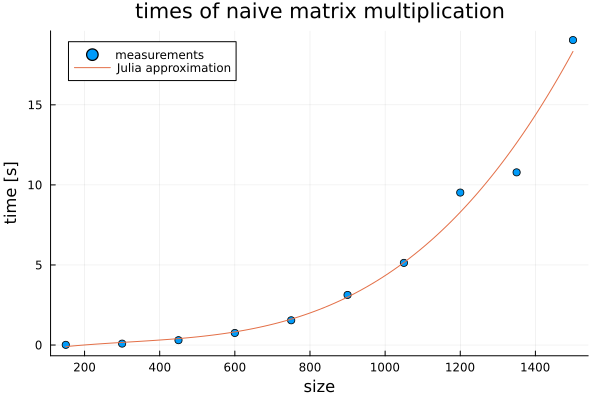

In [33]:
x_vals = stats[!, :2]
y_vals = stats[!, :3]
fit_poly = fit(x_vals, y_vals, 3)
scatter(x_vals, y_vals, title="times of naive matrix multiplication",
xlabel = "size", ylabel = "time [s]", label="measurements")
plot!(fit_poly, extrema(x_vals)..., label="Julia approximation")

Aproksymacja przy pomocy wielomianu trzeciego stopnia (taka jest złożoność algorytmu z którego uzyskano dane)

In [38]:
A = zeros(10, 4)
A[:,1] = x_vals.^3
A[:,2] = x_vals.^2
A[:,3] = x_vals.^1
A[:,4] = x_vals.^0
A

10×4 Matrix{Float64}:
 3.375e6     22500.0        150.0  1.0
 2.7e7       90000.0        300.0  1.0
 9.1125e7   202500.0        450.0  1.0
 2.16e8     360000.0        600.0  1.0
 4.21875e8  562500.0        750.0  1.0
 7.29e8     810000.0        900.0  1.0
 1.15762e9       1.1025e6  1050.0  1.0
 1.728e9         1.44e6    1200.0  1.0
 2.46038e9       1.8225e6  1350.0  1.0
 3.375e9         2.25e6    1500.0  1.0

In [39]:
Afactor = factorize(A)

QRPivoted{Float64, Matrix{Float64}, Vector{Float64}, Vector{Int64}}
Q factor:
10×10 LinearAlgebra.QRPackedQ{Float64, Matrix{Float64}, Vector{Float64}}:
 -0.000710955  -0.0339428  -0.378124   …  -0.0960535  -0.207478   -0.282764
 -0.00568764   -0.118713   -0.518293      -0.0634765   0.220747    0.678134
 -0.0191958    -0.228722   -0.48057        0.497687    0.316026   -0.144889
 -0.0455012    -0.338383   -0.325016      -0.168339   -0.252272   -0.533898
 -0.0888694    -0.422107   -0.111694      -0.128003   -0.0471947   0.0717579
 -0.153566     -0.454308    0.0993344  …  -0.218805   -0.0870957   0.158386
 -0.243858     -0.409397    0.248007      -0.273819   -0.128876    0.1746
 -0.364009     -0.261787    0.274262       0.723252   -0.183053    0.0511814
 -0.518287      0.0141099   0.118037      -0.211292    0.739858   -0.281087
 -0.710955      0.443882   -0.280731      -0.0611514  -0.370663    0.108578
R factor:
4×4 Matrix{Float64}:
 -4.74713e9  -3.53243e6  -2701.6    -2.15064
  0.0       

In [49]:
res = Afactor.R \ (Transpose(Afactor.Q) * y_vals)[1:4]
poly = Polynomial(reverse(res))

Polynomial(-0.582107699999998 + 0.004412541769748748*x - 9.414628598808556e-6*x^2 + 9.919755826066915e-9*x^3)

In [50]:
fit_poly

Polynomial(-0.5821076999999991 + 0.004412541769748756*x - 9.414628598808573e-6*x^2 + 9.919755826066925e-9*x^3)

They are the same picture

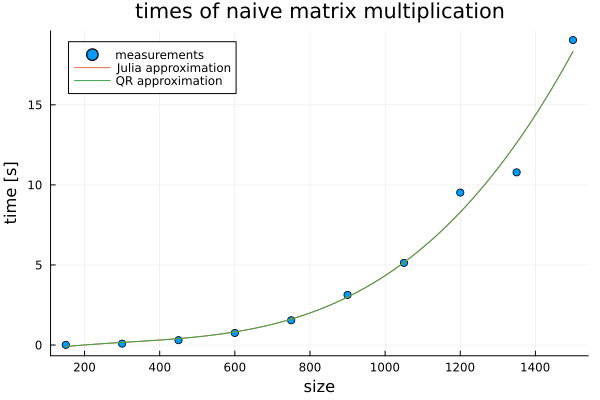

In [51]:
scatter(x_vals, y_vals, title="times of naive matrix multiplication",
xlabel = "size", ylabel = "time [s]", label="measurements")
plot!(fit_poly, extrema(x_vals)..., label="Julia approximation")
plot!(poly, extrema(x_vals)..., label="QR approximation")

### Użycie faktoryzacji QR do znajdowania wartości własnych

Algorytm:
Wyznaczamy wartości własne macierzy $A$.

$A_0 = A$

$A_{k+1} = R_kQ_k=Q_k^{-1}Q_kR_kQ_k=Q_k^{-1}A_kQ_=Q_k^TA_kQ_k$

W każdym kroku obliczamy faktoryzację QR macierzy $A_k$.

Wszystkie macierze $A_k$ są podobne - czyli mają takie same wartości własne, dodatkowo zbiegają do macierzy trójkątnej, której wartości własne można odczytać na przekątnej głównej.

In [61]:
function get_eigenvalues(A, precision)
    for i in 1:precision
        AF = qr(A)
        A = Transpose(AF.Q)*A*AF.Q
    end
    return diag(A)
end

get_eigenvalues (generic function with 1 method)

In [166]:
    
function complexFun(ev)
    return [(real(e),imag(e)) for e in ev]
end

complexFun (generic function with 1 method)

In [78]:
A1 = [1 2; 3 4 ]
ev1 = get_eigenvalues(A1,100)

2-element Vector{Float64}:
  5.37228132326902
 -0.37228132326901425

In [175]:
A2 = [1 -1 0 1; 0.2 8 0.2 5; 1 0 2 1; -1 11 10 -11]
ev2 = get_eigenvalues(A2, 100)

4-element Vector{Float64}:
 -13.980906758533234
  10.679246720202057
   2.7991888902802287
   0.5024711480508883

In [159]:
A3 = rand(ComplexF64, (4, 4))
ev3 = get_eigenvalues(A3, 100)

4-element Vector{ComplexF64}:
  -2.053940793139251 + 0.8578666824263084im
 0.09425439673203817 - 0.22255108919383498im
 0.17159525134004938 - 0.28209654559564773im
 0.28265896291754267 - 0.6367416168123835im

In [176]:
ev1lib = eigen(A1).values
ev2lib = eigen(A2).values
ev3lib = eigen(A3).values
ev3lib

4-element Vector{ComplexF64}:
 -0.3636286447966297 - 0.3395090350806364im
 0.19572289331805576 + 0.10361817607546261im
  0.4162595898255676 + 0.4262345177178387im
  1.8245062643773924 + 2.2617149433721386im

Porównanie uszykanych wyników z wynikami biblioteki

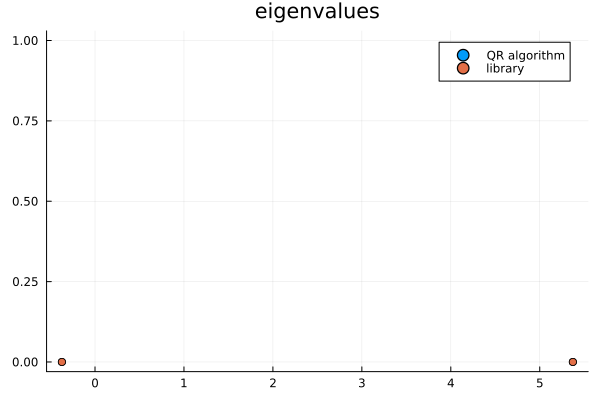

In [168]:
scatter(complexFun(ev1), label="QR algorithm", title="eigenvalues")
scatter!(complexFun(ev1lib), label = "library")

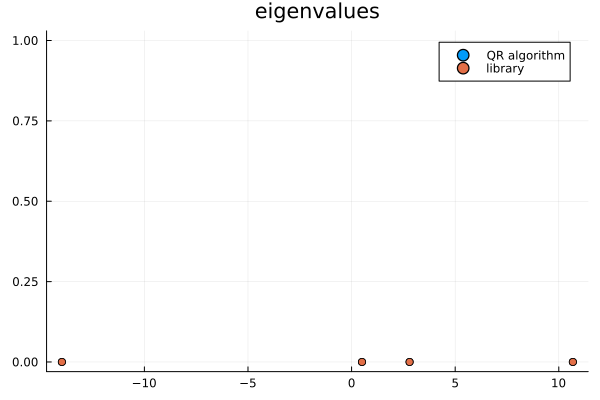

In [177]:
scatter(complexFun(ev2), label="QR algorithm", title="eigenvalues")
scatter!(complexFun(ev2lib), label = "library")

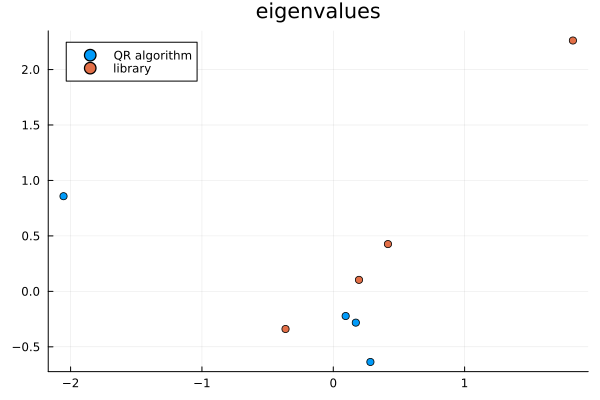

In [170]:
scatter(complexFun(ev3), label="QR algorithm", title="eigenvalues")
scatter!(complexFun(ev3lib), label = "library")

Algorytm nie nadaje się do wyznaczania wartości własnych dla macierzy zespolonych!